# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [24]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [25]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys= [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [28]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1]) 

[01-26 18:10:09][INFO] Se ajustarán 2 parámetros.
[01-26 18:10:09][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


## Conjunto de datos 1

Interpole el conjunto de datos 1 usando la función cuadrática. 

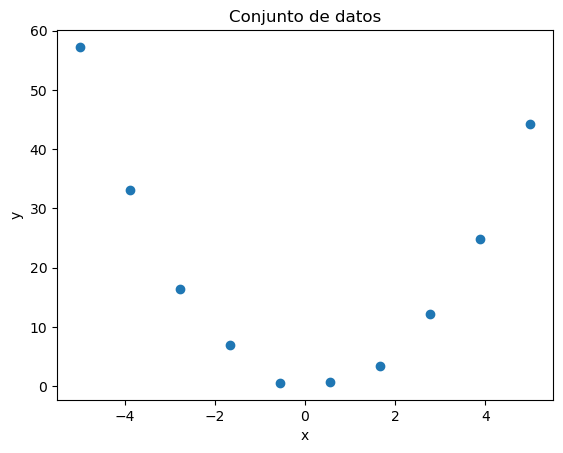

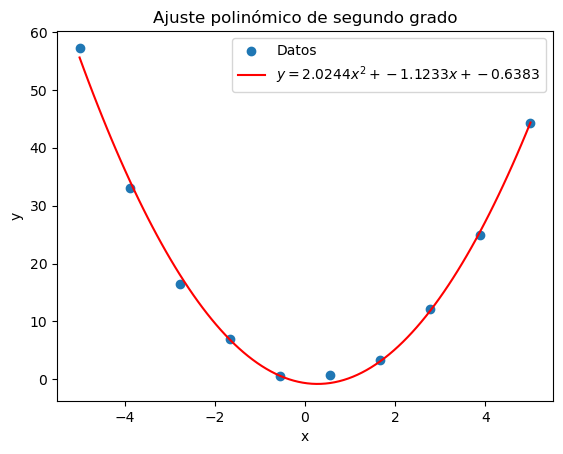

a2 = 2.0244104829250844
a1 = -1.1233251295755442
a0 = -0.6382556172537787
y(2.25) = 7.0828409110094865
y(-2.25) = 12.137803994099436


In [31]:

# Datos
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Graficar los datos originales
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos")
plt.show()

# Ajustar un polinomio de grado 2
coeficientes = np.polyfit(xs1, ys1, 2)

# Extraer coeficientes del polinomio
a2, a1, a0 = coeficientes

# Crear la función polinómica
def polinomio(x):
    return a2 * x**2 + a1 * x + a0

# Generar valores para graficar el ajuste
x_fit = np.linspace(min(xs1), max(xs1), 100)
y_fit = polinomio(x_fit)

# Graficar los datos y el ajuste
plt.scatter(xs1, ys1, label="Datos")
plt.plot(x_fit, y_fit, color="red", label=fr"$y = {a2:.4f}x^2 + {a1:.4f}x + {a0:.4f}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste polinómico de segundo grado")
plt.legend()
plt.show()

# Imprimir resultados
print(f"a2 = {a2}")
print(f"a1 = {a1}")
print(f"a0 = {a0}")

# Calcular valores específicos de y
y_2_25 = polinomio(2.25)
y_neg_2_25 = polinomio(-2.25)
print(f"y(2.25) = {y_2_25}")
print(f"y(-2.25) = {y_neg_2_25}")

## Conjunto de datos 2

Interpole el conjunto de datos 2 usando la función exponencial. 

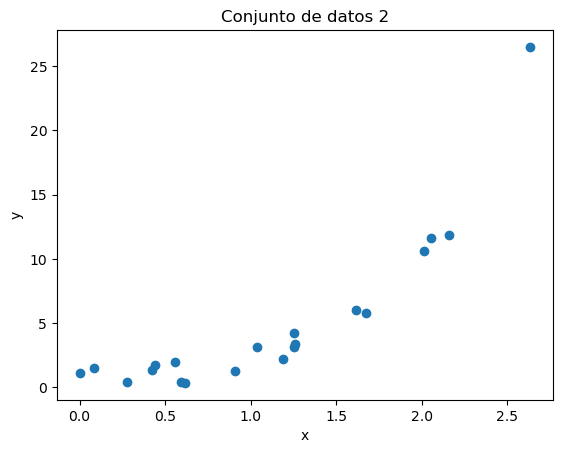

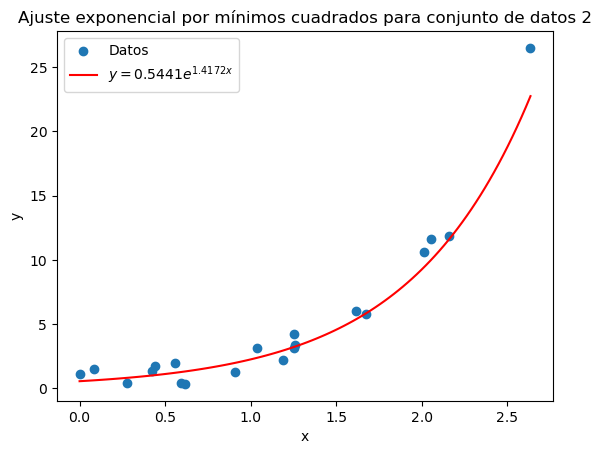

a = 0.5440855388147079
m = 1.4171603667055417
y(5) = 650.117443911165
y(1) = 2.24456460537595


In [27]:


# Datos
xs2 = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 
    1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 
    2.1610, 2.6344
]
ys2 = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 
    3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 
    11.8221, 26.5077
]

# Graficar los datos originales
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

# Función para ajustar una curva exponencial
def ajustar_exponencial(xs, ys):
    # Transformar ys a log(ys) para linealizar
    log_ys = np.log(ys)
    
    # Ajustar una línea a los datos transformados
    m, b = np.polyfit(xs, log_ys, 1)
    
    # La función exponencial ajustada es de la forma y = e^b * e^(m*x)
    a = np.exp(b)
    return a, m

# Obtener los parámetros de la función exponencial ajustada
a, m = ajustar_exponencial(xs2, ys2)

# Generar valores de y usando la función exponencial ajustada
x = np.linspace(min(xs2), max(xs2), 100)
y = a * np.exp(m * x)

# Graficar los datos y la curva ajustada
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=fr"$y = {a:.4f} e^{{{m:.4f}x}}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados para conjunto de datos 2")
plt.legend()
plt.show()

# Imprimir resultados
print(f"a = {a}")
print(f"m = {m}")

# Calcular valores específicos de y
y_5 = a * np.exp(m * 5)
y_1 = a * np.exp(m * 1)
print(f"y(5) = {y_5}")
print(f"y(1) = {y_1}")